In [9]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import transform as transform

tf.compat.v1.disable_eager_execution()

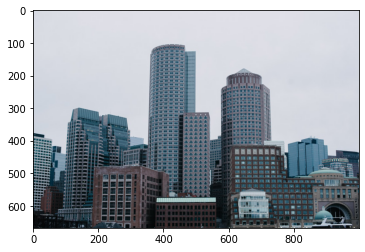

In [10]:
img = Image.open('imgs/01.jpg')
img = np.array(img)

plt.imshow(img)

INFO:tensorflow:Restoring parameters from models/la_muse.ckpt


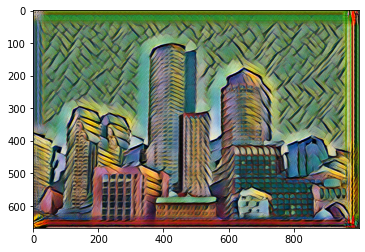

In [11]:
with tf.Graph().as_default(), tf.compat.v1.Session() as sess:
    batch_shape = (1, img.shape[0], img.shape[1], img.shape[2])
    img_placeholder = tf.compat.v1.placeholder(tf.float32, shape=batch_shape, name='img_placeholder')

    net = transform.net(img_placeholder)
    saver = tf.compat.v1.train.Saver()
#     saver.restore(sess, '/Users/brad/Downloads/ckpts/fns.ckpt')
    saver.restore(sess, 'models/la_muse.ckpt')
    
    y_pred = sess.run(net, feed_dict={img_placeholder: np.expand_dims(img, axis=0)})

    y_pred = np.clip(y_pred, 0, 255).astype(np.uint8).squeeze()
    plt.imshow(y_pred)